In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import sem
%matplotlib inline

In [2]:
#ago2022v3
pfak_data = pd.read_csv('data/pfak ct_dox 2020_06_09.csv')
pfak_data.head()

,Unnamed: 0,Label,qualidade,tto,Area,Mean,id_fak,id_gh2ax,mean_bc_fak,mean_bc_gh2ax,ctcf_fak,ctcf_gh2ax,data
0,1,(11)controle 1 - dapi - pfak - gamma - 1_Out-1...,bom,ct,296.224,3666.903,1086225.186,214406.768,1782.849333,369.968333,5.581024e+05,104813.2684,2020_06_09
1,9,(11)controle 1 - dapi - pfak - gamma - 2_Out-1...,ruim,ct,489.450,3490.312,1708331.587,637936.361,1383.368000,490.287333,1.031242e+06,397965.2257,2020_06_10
2,17,(12)controle 1 - dapi - pfak - gamma - 3_Out-1...,bom,ct,326.406,504.480,164665.674,700960.725,224.101000,639.058333,9.151776e+04,492368.2507,2020_06_11
3,25,(9)controle 2 - dapi - pfak - gamma - 1_Out-1....,bom,ct,290.893,2536.544,737863.661,766272.565,462.621667,639.092667,6.032903e+05,580364.9819,2020_06_12
4,33,(12)controle 2 - dapi - pfak - gamma - 2_Out-1...,bom,ct,263.215,2084.512,548675.455,432996.276,427.949000,310.310000,4.360329e+05,351318.0294,2020_06_13


In [3]:
ct_bom = (pfak_data['tto'] == 'ct') & (pfak_data['qualidade'] == 'bom')
dox_bom = (pfak_data['tto'] == 'dox') & (pfak_data['qualidade'] == 'bom')

ct_bom_gh2ax = pfak_data.loc[ct_bom, 'id_gh2ax']
ct_bom_pfak = pfak_data.loc[ct_bom, 'id_fak']

dox_bom_gh2ax = pfak_data.loc[dox_bom, 'id_gh2ax']
dox_bom_pfak = pfak_data.loc[dox_bom, 'id_fak']

pfak = [ct_bom_pfak, dox_bom_pfak]
mean_pfak = [ct_bom_pfak.mean(), dox_bom_pfak.mean()]
sem_pfak =  [ct_bom_pfak.sem(), dox_bom_pfak.sem()]

gh2ax = [ct_bom_gh2ax, dox_bom_gh2ax]
mean_gh2ax = [ct_bom_gh2ax.mean(), dox_bom_gh2ax.mean()]
sem_gh2ax =  [ct_bom_gh2ax.sem(), dox_bom_gh2ax.sem()]


In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pingouin as pg

def teste_normalidade(x):
    # para plotar o histograma
    plt.subplot(1,1,1)
    plt.rcParams["figure.figsize"] = (6,6)

    # para plotar o QQ-plot
    pg.qqplot(x, dist='norm')
    
    # usando skewness e kurtosis para ver
    print('tamanho da amostra: ', len(x))
    print('skewness: ', stats.skew(x), '(Quanto mais longe de zero, menos normal)')
    print('kurtosis: ', stats.kurtosis(x))

    # Usando Shapiro-wilk (não funciona bem em amostras com muitos valores identicos)
    W, p = stats.shapiro(x)
    print('Shapiro-Wilk: W:{0} p={1}'.format(W, p), ' (caso p>0.05, é normal)')

    # usando Kolmogov-Smirnov
    D, p = stats.kstest(x, cdf='norm', args=(x.mean(), x.std()), N = len(x))
    print('Kolmogov-Smirnov: D:{0} p={1}'.format(D, p), ' (caso p>0.05, é normal)')

    # Anderson-Darling test
    ad_stat, ad_critico, ad_teorico = stats.anderson(x, dist='norm')
    print('Anderson-Darling: T:{0} p(0.05)={1}'.format(ad_stat, ad_critico[2]), ' (caso p>0.05, é normal)')
    print('Anderson-Darling resultado referente a porcentagem:',ad_critico)
    print('Anderson-Darling porcentagem:',ad_teorico)

tamanho da amostra:  12
skewness:  0.690420565693456 (Quanto mais longe de zero, menos normal)
kurtosis:  -0.1751272739538967
Shapiro-Wilk: W:0.9280465245246887 p=0.3598659336566925  (caso p>0.05, é normal)
Kolmogov-Smirnov: D:0.1378599932513766 p=0.9531773234583096  (caso p>0.05, é normal)
Anderson-Darling: T:0.32334906792488916 p(0.05)=0.679  (caso p>0.05, é normal)
Anderson-Darling resultado referente a porcentagem: [0.497 0.566 0.679 0.792 0.942]
Anderson-Darling porcentagem: [15.  10.   5.   2.5  1. ]


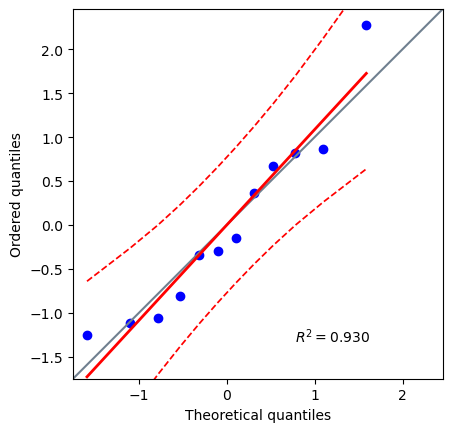

In [5]:
teste_normalidade(dox_bom_pfak)

[568765.380125, 1522733.8769166667]
t=-3.486, p=0.00264
**


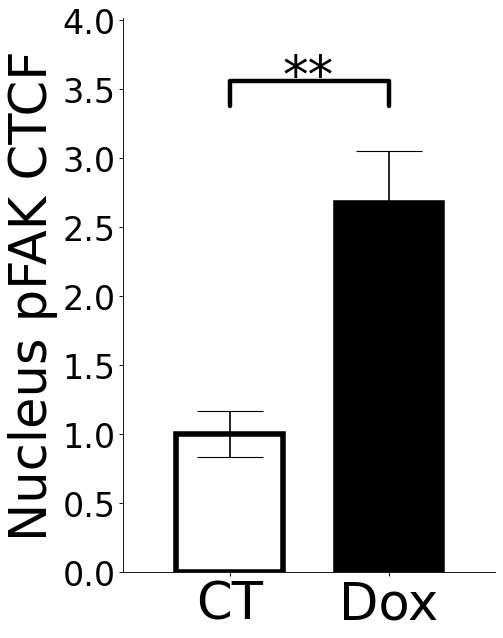

In [6]:
# Dados ######################################### ct dmso x dox dmso (fak)

ttest_group = [pfak[0], pfak[1]]#grupo onde tem todos os dados que serão calculados o ttest
means = [mean_pfak[0], mean_pfak[1]] #grupo onde tem as informações da médias
erro = [sem_pfak[0], sem_pfak[1]] #grupo que contem a informação dos erros

cor_ct = 'white'              #cor do grupo controle (barra1)
cor_dox = 'black'              #cor do grupo dox (barra2)

Nome_imagem_pdf = 'pfak_pfak_ctcf_ct-dox sem.pdf' # nome da imagem salva em .pdf
Nome_imagem_jpeg = 'pfak_pfak_ctcf_ct-dox sem.jpeg' # nome da imagem salva em .jpeg

cor_envolta = "black" #cor da linha envolta das barras
espessura_volta = 5   #espessura da linha envolta das barras
tamanho_barra_erro = 30           #tamanho da barra horizontal de erro

# coisas relacionadas ao eixo Y
Eixo_Y = 'Nucleus pFAK CTCF' # O que vai aparecer escrito no eixo Y
Tamanho_label_Y = 46 # Tamanho do texto do eixo Y
Tamanho_ticks_Y = 30 # Tamanho dos números que aparecem no eixo Y

# coisas relacionadas ao eixo X
labels = ['CT', 'Dox'] #o que vai aparecer embaixo das barras, no eixo X.
Tamanho_label_X = 46 # Tamanho do texto do eixo X

print(means)

# normalização ######################################### 
# essa parte serve para criar um gráfico que visivelmente fica mais fácil ver quantas vezes ficou maior o grupo tratado (barra 2) do controle (barra 1)
# caso não quiser isso, é só comentar todas essa parte ou apagar

erro_ct = erro[0]/means[0]
erro_dox = erro[1]/means[0]
erro = [erro_ct,erro_dox]

ct_norm = means[0]/means[0]
dox_norm = means[1]/means[0]
means = [ct_norm, dox_norm]

# p #########################################
# essa parte é uma função que pega as datas dos dois grupos e faz um teste estatístico t de studant para ver se é uma variação significativa ou não e quanto significativa.
# aparece em asterístico automaticamente no gráfico

stat, p = ttest_ind(ttest_group[0], ttest_group[1])
print('t=%.3f, p=%.5f' % (stat, p))

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "NS"

pValue = convert_pvalue_to_asterisks(p)
print(convert_pvalue_to_asterisks(p))

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y):
    x = (X[0]+X[1])/2
    y = 1.2* max(Y[0], Y[1]) #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.005 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.1*max(means)), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################
x = [.045,.075]  # localização da barra
width = 0.02# espessura da barra

fig, ax = plt.subplots(figsize=(6,9), dpi=80)
barra_controle = ax.bar(x[0], means[0], yerr=erro[0], capsize= tamanho_barra_erro, width= width, color= cor_ct ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[0])
barra_doxo =  ax.bar(x[1], means[1], yerr=erro[1], capsize= tamanho_barra_erro, width= width ,color= cor_dox ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[1])
traco(pValue,x,means)
#rects = ax.patches

# Os números em cima das barras #########################################
#label = ["%.2f"%item for item in means] # essa parte de "%.2f"% é para aparecer o numero em float, se trocar pra i, é inteiro
#for rect, label in zip(rects, label):
    #height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width() / 2, height+0.2*max(means), label,
    #        ha='center', va='bottom')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)
#ax.set_title('média de FAK no núcleo - 24h doxo',fontsize=16, pad = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=Tamanho_label_X)
# plt.ylim(0, 1.6* max(means))
plt.ylim(0,1.5* max(means))
plt.xlim((x[0]-.02),(x[1])+.02)
#plt.legend(prop={"size":15},loc="upper left")
plt.yticks(fontsize=Tamanho_ticks_Y)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(Nome_imagem_pdf,bbox_inches='tight') # a parte do bbox_inches='tight' é que faz o tamanho ficar correto
plt.savefig(Nome_imagem_jpeg,bbox_inches='tight')

plt.show()

[517907.42187499994, 2931368.6802500007]
t=-3.084, p=0.00641
**


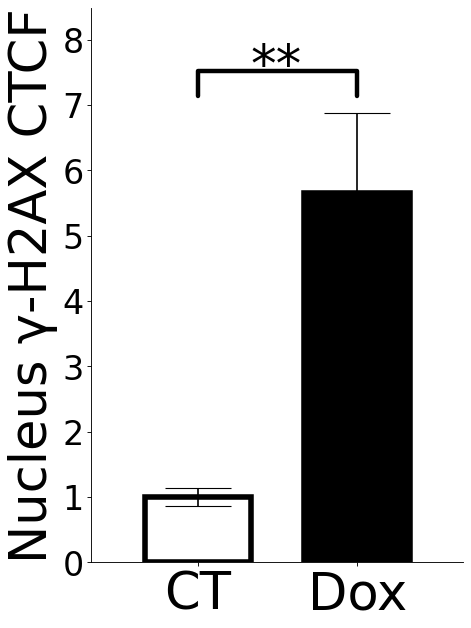

In [7]:
# Dados ######################################### ct dmso x dox dmso (fak)

ttest_group = [gh2ax[0], gh2ax[1]]#grupo onde tem todos os dados que serão calculados o ttest
means = [mean_gh2ax[0], mean_gh2ax[1]] #grupo onde tem as informações da médias
erro = [sem_gh2ax[0], sem_gh2ax[1]] #grupo que contem a informação dos erros


cor_ct = 'white'              #cor do grupo controle (barra1)
cor_dox = 'black'              #cor do grupo dox (barra2)

Nome_imagem_pdf = 'pfak_gh2ax_ctcf_ct-dox sem.pdf' # nome da imagem salva em .pdf
Nome_imagem_jpeg = 'pfak_gh2ax_ctcf_ct-dox semjpeg' # nome da imagem salva em .jpeg

cor_envolta = "black" #cor da linha envolta das barras
espessura_volta = 5   #espessura da linha envolta das barras
tamanho_barra_erro = 30           #tamanho da barra horizontal de erro

# coisas relacionadas ao eixo Y
Eixo_Y = 'Nucleus γ-H2AX CTCF' # O que vai aparecer escrito no eixo Y
Tamanho_label_Y = 46 # Tamanho do texto do eixo Y
Tamanho_ticks_Y = 30 # Tamanho dos números que aparecem no eixo Y

# coisas relacionadas ao eixo X
labels = ['CT', 'Dox'] #o que vai aparecer embaixo das barras, no eixo X.
Tamanho_label_X = 46 # Tamanho do texto do eixo X

print(means)

# normalização ######################################### 
# essa parte serve para criar um gráfico que visivelmente fica mais fácil ver quantas vezes ficou maior o grupo tratado (barra 2) do controle (barra 1)
# caso não quiser isso, é só comentar todas essa parte ou apagar

erro_ct = erro[0]/means[0]
erro_dox = erro[1]/means[0]
erro = [erro_ct,erro_dox]

ct_norm = means[0]/means[0]
dox_norm = means[1]/means[0]
means = [ct_norm, dox_norm]

# p #########################################
# essa parte é uma função que pega as datas dos dois grupos e faz um teste estatístico t de studant para ver se é uma variação significativa ou não e quanto significativa.
# aparece em asterístico automaticamente no gráfico

stat, p = ttest_ind(ttest_group[0], ttest_group[1])
print('t=%.3f, p=%.5f' % (stat, p))

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "NS"

pValue = convert_pvalue_to_asterisks(p)
print(convert_pvalue_to_asterisks(p))

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y):
    x = (X[0]+X[1])/2
    y = 1.2* max(Y[0], Y[1]) #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.005 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.1*max(means)), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################
x = [.045,.075]  # localização da barra
width = 0.02# espessura da barra

fig, ax = plt.subplots(figsize=(6,9), dpi=80)
barra_controle = ax.bar(x[0], means[0], yerr=erro[0], capsize= tamanho_barra_erro, width= width, color= cor_ct ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[0])
barra_doxo =  ax.bar(x[1], means[1], yerr=erro[1], capsize= tamanho_barra_erro, width= width ,color= cor_dox ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[1])
traco(pValue,x,means)
#rects = ax.patches

# Os números em cima das barras #########################################
#label = ["%.2f"%item for item in means] # essa parte de "%.2f"% é para aparecer o numero em float, se trocar pra i, é inteiro
#for rect, label in zip(rects, label):
    #height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width() / 2, height+0.2*max(means), label,
    #        ha='center', va='bottom')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)
#ax.set_title('média de FAK no núcleo - 24h doxo',fontsize=16, pad = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=Tamanho_label_X)
# plt.ylim(0, 1.6* max(means))
plt.ylim(0,1.5* max(means))
plt.xlim((x[0]-.02),(x[1])+.02)
#plt.legend(prop={"size":15},loc="upper left")
plt.yticks(fontsize=Tamanho_ticks_Y)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(Nome_imagem_pdf,bbox_inches='tight') # a parte do bbox_inches='tight' é que faz o tamanho ficar correto
plt.savefig(Nome_imagem_jpeg,bbox_inches='tight')

plt.show()

In [8]:
pfak_all_data = pd.read_csv('pfak results.csv')

In [9]:
pfak_all_data

,Label,tto,Area,id_fak,id_gh2ax,fak_ctcf,gh2ax_ctcf,data,qualidade
0,(18)Controle_pFAK_546_FALOIDINA_647_DAPI 2_Out...,ct,243.003,697458.582,NaN,3.130328e+05,NaN,2020_02_13,NaN
1,(18)Controle_pFAK_546_FALOIDINA_647_DAPI 2_Out...,ct,302.729,941775.055,NaN,4.628639e+05,NaN,2020_02_13,NaN
2,(17)Controle_pFAK_546_FALOIDINA_647_DAPI 3_Out...,ct,222.426,367220.857,NaN,2.040448e+05,NaN,2020_02_13,NaN
3,(18)Controle_pFAK_546_FALOIDINA_647_DAPI 4_Out...,ct,275.546,610585.613,NaN,3.766047e+05,NaN,2020_02_13,NaN
4,(18)Controle_pFAK_546_FALOIDINA_647_DAPI 4_Out...,ct,343.527,791463.231,NaN,4.997560e+05,NaN,2020_02_13,NaN
...,...,...,...,...,...,...,...,...,...
76,(12)doxo 2 - dapi - pfak - gamma - 4_Out-1.czi...,dox,214.290,738877.546,2209175.779,6.212888e+05,1983221.903,2020_06_09,bom
77,(12)doxo 2 - dapi - pfak - gamma - 4_Out-1.czi...,dox,200.623,638625.621,1500228.960,5.285365e+05,1288685.983,2020_06_09,bom
78,(12)doxo 2 - dapi - pfak - gamma - 5_Out-1.czi...,dox,181.500,779665.785,1142939.313,6.736492e+05,995292.935,2020_06_09,bom
79,(12)doxo 3 - dapi - pfak - gamma - 2_Out-1.czi...,dox,459.050,1782721.035,2325757.615,1.517323e+06,2053551.370,2020_06_09,bom


In [10]:
ct_bom = (pfak_all_data['tto'] == 'ct') 
dox_bom = (pfak_all_data['tto'] == 'dox')

ct_bom_gh2ax = pfak_all_data.loc[ct_bom, 'gh2ax_ctcf'].dropna()
ct_bom_pfak = pfak_all_data.loc[ct_bom, 'fak_ctcf'].dropna()

dox_bom_gh2ax = pfak_all_data.loc[dox_bom, 'gh2ax_ctcf'].dropna()
dox_bom_pfak = pfak_all_data.loc[dox_bom, 'fak_ctcf'].dropna()

pfak = [ct_bom_pfak, dox_bom_pfak]
mean_pfak = [ct_bom_pfak.mean(), dox_bom_pfak.mean()]
sem_pfak =  [ct_bom_pfak.sem(), dox_bom_pfak.sem()]

gh2ax = [ct_bom_gh2ax, dox_bom_gh2ax]
mean_gh2ax = [ct_bom_gh2ax.mean(), dox_bom_gh2ax.mean()]
sem_gh2ax =  [ct_bom_gh2ax.sem(), dox_bom_gh2ax.sem()]

[353255.55668121955, 1396939.9913800003]
t=-8.947, p=0.00000
****


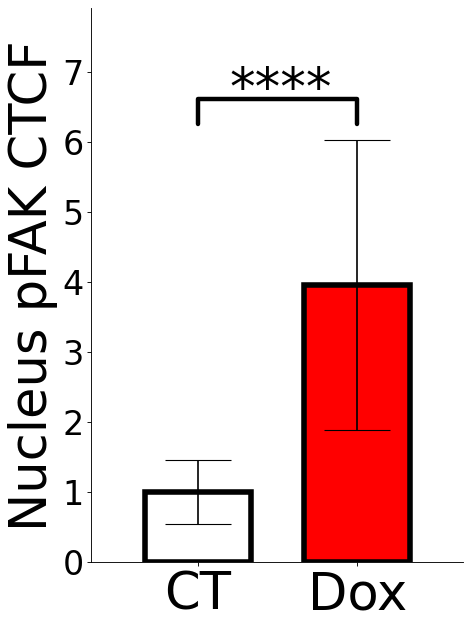

In [11]:
# Dados ######################################### ct dmso x dox dmso (fak)

ttest_group = [pfak[0], pfak[1]]#grupo onde tem todos os dados que serão calculados o ttest
means = [mean_pfak[0], mean_pfak[1]] #grupo onde tem as informações da médias
erro = [pfak[0].std(), pfak[1].std()] #grupo que contem a informação dos erros

cor_ct = 'white'              #cor do grupo controle (barra1)
cor_dox = 'red'              #cor do grupo dox (barra2)

Nome_imagem_pdf = 'pfak_pfak_ctcf_ct-dox std.pdf' # nome da imagem salva em .pdf
Nome_imagem_jpeg = 'pfak_pfak_ctcf_ct std.jpeg' # nome da imagem salva em .jpeg

cor_envolta = "black" #cor da linha envolta das barras
espessura_volta = 5   #espessura da linha envolta das barras
tamanho_barra_erro = 30           #tamanho da barra horizontal de erro

# coisas relacionadas ao eixo Y
Eixo_Y = 'Nucleus pFAK CTCF' # O que vai aparecer escrito no eixo Y
Tamanho_label_Y = 46 # Tamanho do texto do eixo Y
Tamanho_ticks_Y = 30 # Tamanho dos números que aparecem no eixo Y

# coisas relacionadas ao eixo X
labels = ['CT', 'Dox'] #o que vai aparecer embaixo das barras, no eixo X.
Tamanho_label_X = 46 # Tamanho do texto do eixo X

print(means)

# normalização ######################################### 
# essa parte serve para criar um gráfico que visivelmente fica mais fácil ver quantas vezes ficou maior o grupo tratado (barra 2) do controle (barra 1)
# caso não quiser isso, é só comentar todas essa parte ou apagar

erro_ct = erro[0]/means[0]
erro_dox = erro[1]/means[0]
erro = [erro_ct,erro_dox]

ct_norm = means[0]/means[0]
dox_norm = means[1]/means[0]
means = [ct_norm, dox_norm]

# p #########################################
# essa parte é uma função que pega as datas dos dois grupos e faz um teste estatístico t de studant para ver se é uma variação significativa ou não e quanto significativa.
# aparece em asterístico automaticamente no gráfico

stat, p = ttest_ind(ttest_group[0], ttest_group[1])
print('t=%.3f, p=%.5f' % (stat, p))

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "NS"

pValue = convert_pvalue_to_asterisks(p)
print(convert_pvalue_to_asterisks(p))

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y):
    x = (X[0]+X[1])/2
    y = 1.5* max(Y[0], Y[1]) #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.009 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.15*max(means)), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################
x = [.045,.075]  # localização da barra
width = 0.02# espessura da barra

fig, ax = plt.subplots(figsize=(6,9), dpi=80)
barra_controle = ax.bar(x[0], means[0], yerr=erro[0], capsize= tamanho_barra_erro, width= width, color= cor_ct ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[0])
barra_doxo =  ax.bar(x[1], means[1], yerr=erro[1], capsize= tamanho_barra_erro, width= width ,color= cor_dox ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[1])
traco(pValue,x,means)
#rects = ax.patches

# Os números em cima das barras #########################################
#label = ["%.2f"%item for item in means] # essa parte de "%.2f"% é para aparecer o numero em float, se trocar pra i, é inteiro
#for rect, label in zip(rects, label):
    #height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width() / 2, height+0.2*max(means), label,
    #        ha='center', va='bottom')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)
#ax.set_title('média de FAK no núcleo - 24h doxo',fontsize=16, pad = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=Tamanho_label_X)
# plt.ylim(0, 1.6* max(means))
plt.ylim(0,2* max(means))
plt.xlim((x[0]-.02),(x[1])+.02)
#plt.legend(prop={"size":15},loc="upper left")
plt.yticks(fontsize=Tamanho_ticks_Y)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(Nome_imagem_pdf,bbox_inches='tight') # a parte do bbox_inches='tight' é que faz o tamanho ficar correto
plt.savefig(Nome_imagem_jpeg,bbox_inches='tight')

plt.show()

[337220.65990161296, 4109893.348430556]
t=-3.962, p=0.00019
***


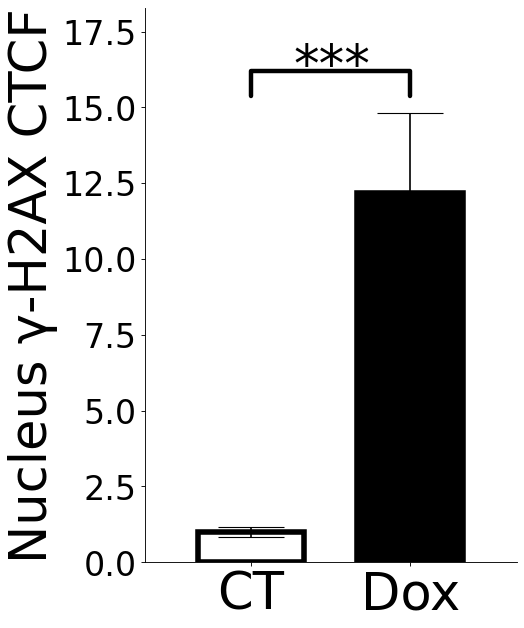

In [12]:
# Dados ######################################### ct dmso x dox dmso (fak)

ttest_group = [gh2ax[0], gh2ax[1]]#grupo onde tem todos os dados que serão calculados o ttest
means = [mean_gh2ax[0], mean_gh2ax[1]] #grupo onde tem as informações da médias
erro = [sem_gh2ax[0], sem_gh2ax[1]] #grupo que contem a informação dos erros


cor_ct = 'white'              #cor do grupo controle (barra1)
cor_dox = 'black'              #cor do grupo dox (barra2)

Nome_imagem_pdf = 'pfak_gh2ax_ctcf_ct-dox sem.pdf' # nome da imagem salva em .pdf
Nome_imagem_jpeg = 'pfak_gh2ax_ctcf_ct-dox sem.jpeg' # nome da imagem salva em .jpeg

cor_envolta = "black" #cor da linha envolta das barras
espessura_volta = 5   #espessura da linha envolta das barras
tamanho_barra_erro = 30           #tamanho da barra horizontal de erro

# coisas relacionadas ao eixo Y
Eixo_Y = 'Nucleus γ-H2AX CTCF' # O que vai aparecer escrito no eixo Y
Tamanho_label_Y = 46 # Tamanho do texto do eixo Y
Tamanho_ticks_Y = 30 # Tamanho dos números que aparecem no eixo Y

# coisas relacionadas ao eixo X
labels = ['CT', 'Dox'] #o que vai aparecer embaixo das barras, no eixo X.
Tamanho_label_X = 46 # Tamanho do texto do eixo X

print(means)

# normalização ######################################### 
# essa parte serve para criar um gráfico que visivelmente fica mais fácil ver quantas vezes ficou maior o grupo tratado (barra 2) do controle (barra 1)
# caso não quiser isso, é só comentar todas essa parte ou apagar

erro_ct = erro[0]/means[0]
erro_dox = erro[1]/means[0]
erro = [erro_ct,erro_dox]

ct_norm = means[0]/means[0]
dox_norm = means[1]/means[0]
means = [ct_norm, dox_norm]

# p #########################################
# essa parte é uma função que pega as datas dos dois grupos e faz um teste estatístico t de studant para ver se é uma variação significativa ou não e quanto significativa.
# aparece em asterístico automaticamente no gráfico

stat, p = ttest_ind(ttest_group[0], ttest_group[1])
print('t=%.3f, p=%.5f' % (stat, p))

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "NS"

pValue = convert_pvalue_to_asterisks(p)
print(convert_pvalue_to_asterisks(p))

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y):
    x = (X[0]+X[1])/2
    y = 1.2* max(Y[0], Y[1]) #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.007 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.1*max(means)), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################
x = [.045,.075]  # localização da barra
width = 0.02# espessura da barra

fig, ax = plt.subplots(figsize=(6,9), dpi=80)
barra_controle = ax.bar(x[0], means[0], yerr=erro[0], capsize= tamanho_barra_erro, width= width, color= cor_ct ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[0])
barra_doxo =  ax.bar(x[1], means[1], yerr=erro[1], capsize= tamanho_barra_erro, width= width ,color= cor_dox ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[1])
traco(pValue,x,means)
#rects = ax.patches

# Os números em cima das barras #########################################
#label = ["%.2f"%item for item in means] # essa parte de "%.2f"% é para aparecer o numero em float, se trocar pra i, é inteiro
#for rect, label in zip(rects, label):
    #height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width() / 2, height+0.2*max(means), label,
    #        ha='center', va='bottom')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)
#ax.set_title('média de FAK no núcleo - 24h doxo',fontsize=16, pad = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=Tamanho_label_X)
# plt.ylim(0, 1.6* max(means))
plt.ylim(0,1.5* max(means))
plt.xlim((x[0]-.02),(x[1])+.02)
#plt.legend(prop={"size":15},loc="upper left")
plt.yticks(fontsize=Tamanho_ticks_Y)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(Nome_imagem_pdf,bbox_inches='tight') # a parte do bbox_inches='tight' é que faz o tamanho ficar correto
plt.savefig(Nome_imagem_jpeg,bbox_inches='tight')

plt.show()